# Monthly Milk Production

In [207]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
def get_milk():
    engine =  create_engine('sqlite:///../data/database/happycows.db')
    with engine.connect() as con:
        milk = pd.read_sql_table('milk_volume', con)
    return milk

In [209]:
milk = get_milk().set_index('date')

In [226]:
def plot_unique_cows_milked_by_month(milk, start='2016-01-01', end='2017-12-31'):
    milk['animal_count'] = milk.groupby('date')['animal_id'].nunique()
    milk = milk[start:end].resample('M').median()['animal_count'].reset_index()
    
    milk['formated_date'] = milk['date'].dt.strftime('%Y-%m')
    
    ax = sns.barplot(x='formated_date', y='animal_count', data=milk, color='#3498db')
    _ = plt.ylabel('Animal Count')
    _ = plt.xlabel('Month')
    _ = plt.xticks(rotation='vertical')
    _ = plt.title('Unique Animals Milked Per Month')
    plt.savefig('../reports/figures/unique_animals_per_month.png', dpi=300, bbox_inches='tight')
    return ax

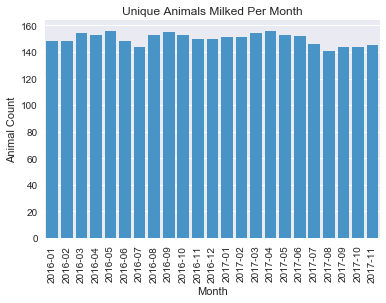

In [227]:
plot_unique_cows_milked_by_month(milk)
plt.show()

In [224]:
def plot_total_milk_by_month(milk, start='2016-01-01', end='2017-12-31'):
    milk = milk[start:end].resample('M').sum()['milk_weight']
    ax = plt.plot(milk)
    _ = plt.ylabel('Milk-Weight')
    _ = plt.xlabel('Month')
    _ = plt.xticks(rotation='vertical')
    _ = plt.title(f'Herd Milk Weight Totals by Month {start} to {end}')
    plt.savefig('../reports/figures/herd_total_milk_per_month.png', dpi=300, bbox_inches='tight')
    return ax

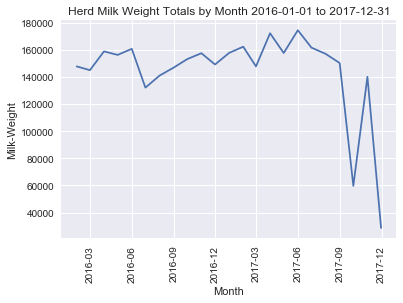

In [225]:
plot_total_milk_by_month(milk, start='2016-01-01', end='2017-12-31')
plt.show()